In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

### 실습 과제 1. Boston_house_small 데이터를 활용한 PCA + regression 실습

#### 1) 데이터 불러온 후 train_data : test_data = 7:3 split, random_state=10
** 종속변수는 ‘Target', 독립변수는 나머지 변수

In [6]:
from sklearn.model_selection import train_test_split

house = pd.read_csv('../data/Boston_house_small.csv')
X = house.drop('Target', axis=1)
y = house.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#### 2) PCA 수행해서 주성분(principal component) 개수에 따른 mean squared Error 그래프 그리고, principal component 개수에 따른 PCA의 explained_variance_ratio 구하기
**cross_val_score 함수 이용해서(cv=5) principal component 5개까지 mean squared error 구하기



Text(0.5, 1.0, 'hp')

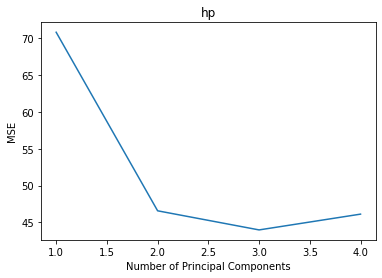

In [21]:
pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))
reg = LinearRegression()
mse = []

for i in np.arange(1, 5):
    score = -1 * cross_val_score(reg, X_train_reduced[:, :i], y_train, cv=5, scoring='neg_mean_squared_error').mean()
    mse.append(score)

num_pc = np.arange(1, 5)
plt.plot(num_pc, mse)
plt.xlabel("Number of Principal Components")
plt.ylabel("MSE")
plt.title('hp')

In [22]:
print("Explained variance per principal component : {}".format(pca.explained_variance_ratio_))

Explained variance per principal component : [0.4903983  0.10552172 0.08436537 0.07794373 0.06522836 0.05725848
 0.04260774 0.02852523 0.01583058 0.01303964 0.01268944 0.00498424
 0.00160716]


#### 3) 가장 작은 mean squared error 가지는 주성분 개수로  PCA 수행하고, regression을 하기. 검증 데이터(test data)에 대한 mean squared error 구하고,  모델의 R^2 구하기

In [27]:
pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.transform(scale(X_test))

In [28]:
reg = LinearRegression()
reg.fit(X_train_reduced, y_train)

pred = reg.predict(X_test_reduced)

print('mse: ', mean_squared_error(y_test, pred))
print('R^2: ', r2_score(y_test, pred))

mse:  36.42802456441782
R^2:  0.7305351279833863


#### 4)  PCA 없이 regression 하기. 검증 데이터(test data)에 대한 mean squared error 구하고,  모델이 R^2 구한 후 PCA를 수행한 결과와 비교하기

In [29]:
reg = LinearRegression()
reg.fit(X_train, y_train)

pred = reg.predict(X_test)

print('mse: ', mean_squared_error(y_test, pred))
print('R^2: ', r2_score(y_test, pred))

mse:  46.78406291711634
R^2:  0.6539295864346182


### 실습 과제 2. Iris 데이터를 활용한 PCA + SVM 실습

#### 1) 데이터 불러온 후 train_data : test_data = 7:3 split, random_state=100
** 종속변수는 ‘Target', 독립변수는 나머지 변수

In [31]:
from sklearn.model_selection import train_test_split

iris = pd.read_csv('../data/iris.csv')
X = iris.drop('Species', axis=1)
y = iris.Species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) PCA 수행해서 주성분(principal component) 개수에 따른 accuracy그래프 그리기
**cross_val_score 함수 이용해서(cv=5) principal component 5개까지 accuracy 구하기

Text(0, 0.5, 'accuracy')

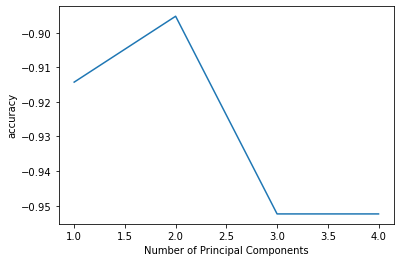

In [32]:
from sklearn import svm

pca = PCA()
X_train_reduced = pca.fit_transform(scale(X_train))
accuracy = []

for i in np.arange(1, 5):
    score = -1 * cross_val_score(svm.SVC(), X_train_reduced[:, :i], y_train, cv=5, scoring='accuracy').mean()
    accuracy.append(score)

num_pc = np.arange(1, 5)
plt.plot(num_pc, accuracy)
plt.xlabel("Number of Principal Components")
plt.ylabel("accuracy")

#### 3) 높은 accuracy 가지는 주성분 개수로 PCA 수행하고, 5-fold 교차 검증으로 SVM의 최적 하이퍼파라미터 구하기. 검증 데이터(test data)에 대한 최적 모델의 accuracy와 confusion matrix 구하기
** C: [0.01, 0.1, 0.5, 1, 10, 100], gamma: [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], kernel: ['rbf', 'poly', 'linear']

In [33]:
pca = PCA(n_components=2)

X_train_reduced = pca.fit_transform(scale(X_train))
X_test_reduced = pca.transform(scale(X_test))

In [34]:
from sklearn.model_selection import GridSearchCV

param = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
         'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(svm.SVC(), param, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'linear']},
             return_train_score=True, scoring='accuracy')

#### 4) PCA 없이 최적 하이퍼파라미터로 SVM 모델 학습하기 , 검증 데이터(test data)에 대한 accuracy와 confusion matrix 구하기

In [36]:
best_params = grid.best_params_
best_svm = grid.best_estimator_
y_pred = best_svm.predict(X_test_reduced)

In [39]:
from sklearn import metrics
con_mat = metrics.confusion_matrix(y_test, y_pred)
acc_lin = metrics.accuracy_score(y_test, y_pred)

print("accuracy : ", acc_lin)
print("confusion matrix : ")
print(con_mat)

accuracy :  0.9555555555555556
confusion matrix : 
[[16  0  0]
 [ 0 11  0]
 [ 0  2 16]]
